# Sect 27: K-Nearest Neighbors

online-ds-pt-041320

09/04/20

### Learning Objectives:


- Understand the different distance metrics
- Understand how K-Nearest Neighbors works 
- Use K-Nearest Neighbors to impute missing data
- Do the KNN with Scikit Learn Lab together (if time)

# Distance Metrics

### Manhattan

<img src ="https://raw.githubusercontent.com/learn-co-students/dsc-distance-metrics-online-ds-ft-100719/master/images/manhattan_fs.png" width=50%>


$$ \large d(x,y) = \sum_{i=1}^{n}|x_i - y_i | $$  
> - "The right side of the equals sign means "calculate the absolute number of units you move in each distinct dimension, and then sum them all up"."
- "The  $\Sigma$  just means "the cumulative sum of each step". In a given step, you take a dimension, and then look at the corresponding values for that dimension on point X and point Y. 
- You then compute the absolute value of the difference between them by subtracting Y's value for that dimension from X's value for that dimension, and then add it to our total."

### Euclidian

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-distance-metrics-online-ds-ft-100719/master/images/euclidean_fs.png" width=20%>

 The equation at the heart of this one is probably familiar to you: $a^2 + b^2 = c^2$, or the **_Pythagorean theorem_**
 
 $$ \large d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} $$  


### Minkowski

- A generalized distance metric across a _Normed Vector Space_.
> - "A Normed Vector Space"= a collection of space where each point has been processed by a function (any function, as long it meets two criteria:) 
    1. the zero vector (just a vector filled with zeros) will output a length of 0, and 
    2. every other vector must have a positive length 

$$\large d(x, y) = \left(\sum_{i=1}^{n}|x_i - y_i|^c\right)^\frac{1}{c}$$  


> Both the Manhattan and Euclidean distances are actually _special cases of Minkowski distance_. 


# K Nearest Neighbors

- Supervised Learning
- Classification OR regression.


### Predicting the Class for the Red Dot
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-distance-metrics-online-ds-pt-100719/master/images/knn_fs.png" width=50%>


## Get the classes of the K closest points to use as predictions

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-finding-the-best-value-for-k-onl01-dtsc-pt-041320/master/images/best_k_fs.png" width=50%>

### Finding the Best K Using Elbow Plots

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-finding-the-best-value-for-k-onl01-dtsc-pt-041320/master/images/plot_fs.png" width=50%>

# Activity: KNN with Scikit Learn - Lab


## Part 1: The Manual/Solution Way

> Hop over to "`KNN with scikit-learn - Lab-SG.ipynb`"

- [Learn Lesson](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-27-k-nearest-neighbors/knn-with-scikit-learn-lab)

## Part 2: The Pipeline + GridSearch Way

In [1]:
# Import pandas and set the standard alias 
from fsds.imports import *

fsds v0.2.23 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
# Import the data from 'titanic.csv' and store it in a pandas DataFrame 
raw_df = fs.datasets.load_titanic(read_csv_kwds={'index_col':0})
raw_df.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'],
            inplace=True)

# Print the head of the DataFrame to ensure everything loaded correctly 
df = raw_df.copy()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,?,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


> ### Create training and test sets
* Use `train_test_split()` to split the data into training and test sets, with a `test_size` of `0.25`. Set the `random_state` to 42 

In [3]:
from sklearn.model_selection import train_test_split

## Get X, y and train-test-split
target = 'Survived'
X = df.drop(columns=target).copy()
y = df[target].copy()


## train tst split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,
                                                    random_state=42)
[print(var.shape) for var in [X_train, X_test]];

(668, 7)
(223, 7)


### Required Preprocessing

> Since you've done this before, you should be able to do this quite well yourself without much hand holding by now. In the cells below, complete the following steps:
1. ~~Remove unnecessary columns (`'PassengerId'`, `'Name'`, `'Ticket'`, and `'Cabin'`) ~~
2. Convert `'Sex'` to a binary encoding, where female is `0` and male is `1` 
3. Detect and deal with any missing values in the dataset:  
    * For `'Age'`, replace missing values with the median age for the dataset  
    * For `'Embarked'`, drop the rows that contain missing values
4. One-hot encode categorical columns such as `'Embarked'` 
5. Store the target column, `'Survived'`, in a separate variable and remove it from the DataFrame  

> #### Normalizing the data 
* Import and instantiate `StandardScaler` 
* Use the scaler's `.fit_transform()` method to create a scaled version of the training dataset  
* Use the scaler's `.transform()` method to create a scaled version of the test dataset  
* The result returned by `.fit_transform()` and `.transform()` methods will be numpy arrays, not a pandas DataFrame. Create a new pandas DataFrame out of this object called `scaled_df`. To set the column names back to their original state, set the `columns` parameter to `one_hot_df.columns` 
* Print the head of `scaled_df` to ensure everything worked correctly 

## Preprocessing with Pipelines +  `ColumnTransformer`

- [Pipeline Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- [ColumnTransformer Documentation](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

In [4]:
from sklearn.pipeline import Pipeline

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### Preprocess Numeric Columns

In [6]:
## Get list of numeric features to sacle
num_cols = X_train.select_dtypes('number').columns.tolist()
num_cols

['Age', 'SibSp', 'Parch', 'Fare']

In [7]:
## Create a num_trasnformer pipeline 
## that will impute using median and then calculate z-scores
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())])

In [8]:
## .fit_transform X_train
# X_train_tf = num_transformer.fit_transform(X_train)

In [9]:
X_train_tf_num = num_transformer.fit_transform(X_train[num_cols])
X_test_tf_num = num_transformer.transform(X_train[num_cols])
X_train_tf_num

array([[-0.08764782, -0.46765956, -0.46887833, -0.0325683 ],
       [-0.31820308, -0.46765956, -0.46887833, -0.48733085],
       [-0.39505484, -0.46765956,  2.04687047, -0.34285405],
       ...,
       [ 0.91142501,  1.22097065, -0.46887833, -0.35045024],
       [-1.1635724 ,  0.37665554,  2.04687047,  1.7030926 ],
       [-0.62561011, -0.46765956,  0.78899607,  0.8747751 ]])

In [10]:
## Get list of cat features to encode
cat_cols = X.select_dtypes('O').columns.tolist()
cat_cols

['Pclass', 'Sex', 'Embarked']

In [11]:
## Create a cat_transformer pipeline 
## that will impute using median and then calculate z-scores
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))])

In [12]:
X_train_tf_ohe = cat_transformer.fit_transform(X_train[cat_cols])
X_test_tf_ohe = cat_transformer.transform(X_test[cat_cols])
X_train_tf_ohe.todense().shape

(668, 10)

## Putting it all together with ColumnTransformer

- Column Transformer DOocumentation: 
- https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display='text')#'diagram')

In [14]:
display(num_transformer)
display(cat_transformer)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [15]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessing = ColumnTransformer(transformers=[
        ('num',num_transformer,num_cols),
        ('cat',cat_transformer,cat_cols)], verbose=False)

### Viewing Pipeline

In [16]:
from sklearn import set_config
set_config(display='diagram')

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked'])])

In [17]:
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)
X_train_tf

array([[-0.08764782, -0.46765956, -0.46887833, ...,  0.        ,
         1.        ,  0.        ],
       [-0.31820308, -0.46765956, -0.46887833, ...,  0.        ,
         1.        ,  0.        ],
       [-0.39505484, -0.46765956,  2.04687047, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.91142501,  1.22097065, -0.46887833, ...,  0.        ,
         1.        ,  0.        ],
       [-1.1635724 ,  0.37665554,  2.04687047, ...,  0.        ,
         1.        ,  0.        ],
       [-0.62561011, -0.46765956,  0.78899607, ...,  0.        ,
         1.        ,  0.        ]])

### Finding Feature Names

In [18]:
set_config(display='diagram')

In [19]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked'])])

In [20]:
preprocessing.named_transformers_['cat']

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [21]:
preprocessing.named_transformers_['cat'].named_steps['encoder']

OneHotEncoder(handle_unknown='ignore')

In [22]:
ohe_cols = preprocessing.named_transformers_['cat'].named_steps['encoder'].get_feature_names(cat_cols)
ohe_cols.tolist()

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Pclass_?',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Embarked_missing']

In [23]:
X_columns = num_cols+ohe_cols.tolist()
X_columns

['Age',
 'SibSp',
 'Parch',
 'Fare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Pclass_?',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Embarked_missing']

In [24]:
X_train_tf = pd.DataFrame(preprocessing.fit_transform(X_train),
                          columns=X_columns)
X_train_tf

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Pclass_?,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
0,-0.087648,-0.467660,-0.468878,-0.032568,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.318203,-0.467660,-0.468878,-0.487331,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.395055,-0.467660,2.046870,-0.342854,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.548758,-0.467660,-0.468878,-0.478201,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-2.168793,0.376656,2.046870,2.314937,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,-0.625610,-0.467660,-0.468878,-0.475695,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
664,-0.087648,-0.467660,-0.468878,-0.022872,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
665,0.911425,1.220971,-0.468878,-0.350450,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
666,-1.163572,0.376656,2.046870,1.703093,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [25]:
X_test_tf = pd.DataFrame(preprocessing.transform(X_test),
                          columns=X_columns)
X_test_tf

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Pclass_?,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
0,-0.087648,0.376656,0.788996,-0.328391,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.142907,-0.467660,-0.468878,-0.420425,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.702462,-0.467660,-0.468878,-0.470362,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.778386,-0.467660,0.788996,0.015914,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.163572,0.376656,-0.468878,-0.406042,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,-0.318203,-0.467660,0.788996,-0.119836,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
219,-0.087648,-0.467660,-0.468878,-0.483452,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
220,-0.087648,-0.467660,-0.468878,-0.470928,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
221,-0.395055,-0.467660,-0.468878,-0.371943,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


> ## Fit a KNN model
Now that you've preprocessed the data it's time to train a KNN classifier and validate its accuracy. 
In the cells below:
* Import `KNeighborsClassifier` from the `sklearn.neighbors` module 
* Instantiate the classifier. For now, you can just use the default parameters  
* Fit the classifier to the training data/labels
* Use the classifier to generate predictions on the test data. Store these predictions inside the variable `test_preds` 

In [27]:
from sklearn.neighbors import KNeighborsClassifier
## Use our preprocessor as the first step in a modeling pipelien
pipeline = Pipeline(steps=[('preprocessor',preprocessing),
                     ('knn',KNeighborsClassifier())])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('knn', KNeighborsClassifier())])

In [28]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('knn', KNeighborsClassifier())])

In [29]:
y_hat_test = pipeline.predict(X_test)
pipeline.score(X_test,y_test)

0.7982062780269058

In [30]:
y_test.value_counts(1)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

> ## Evaluate the model
- Here we will deviate and we will use the assignment/challenge function `evaluate_classification` from sect 25-Pt2 s.g.

### ✅ Activity: Make an `evaluate_classification` function

- From last class

In [31]:
import sklearn.metrics as metrics

def evaluate_classification(model,X_test,y_test,classes=None,
                           normalize='true',cmap='Purples',label=''):
    """Accepts an sklearn-compatible classification model + test data 
    and displays several sklearn.metrics functions: 
    - classifciation_report
    - plot_confusion_matrix
    - plot_roc_curve
    """
     
    ## Get Predictions
    y_hat_test = model.predict(X_test)
    
    
    ## Classification Report / Scores 
    table_header = "[i] CLASSIFICATION REPORT"
    
    ## Add Label if given
    if len(label)>0:
        table_header += f" {label}"
        
    
    ## PRINT CLASSIFICATION REPORT
    dashes = '---'*20
    print(dashes,table_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))
    
    report = metrics.classification_report(y_test,y_hat_test,
                                               target_names=classes,
                                          output_dict=True)
    print(dashes+"\n\n")
    
    

    ## MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,4),ncols=2)
    
    ## Plot Confusion Matrix 
    metrics.plot_confusion_matrix(model, X_test,y_test,
                                  display_labels=classes,
                                  normalize=normalize,
                                 cmap=cmap,ax=axes[0])
    axes[0].set(title='Confusion Matrix')
    
    ## Plot Roc Curve
    roc_plot = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].legend()
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].grid()
    axes[1].set_title('Receiving Operator Characteristic (ROC) Curve') 
    fig.tight_layout()
    plt.show()
    
    return report #fig,axes

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.82      0.86      0.84       134
    Survived       0.77      0.71      0.74        89

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223

------------------------------------------------------------




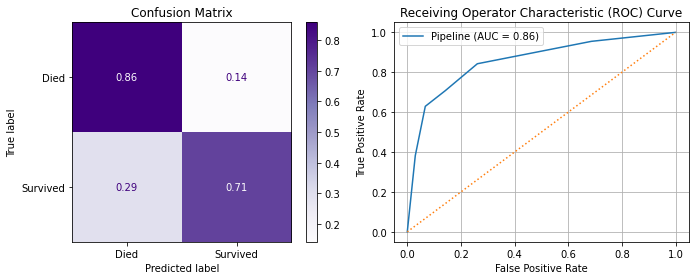

In [32]:
res = evaluate_classification(pipeline,X_test,y_test,
                              classes=['Died','Survived'])

> Interpret each of the metrics above, and explain what they tell you about your model's capabilities. If you had to pick one score to best describe the performance of the model, which would you choose? Explain your answer.
- Discuss as a group


>## Improve model performance
While your overall model results should be better than random chance, they're probably mediocre at best given that you haven't tuned the model yet. For the remainder of this notebook, you'll focus on improving your model's performance. Remember that modeling is an **_iterative process_**, and developing a baseline out of the box model such as the one above is always a good start. <br>
First, try to find the optimal number of neighbors to use for the classifier. To do this, complete the `find_best_k()` function below to iterate over multiple values of K and find the value of K that returns the best overall performance. <br><br>
**The function takes in six arguments:**
* `X_train`
* `y_train`
* `X_test`
* `y_test`
* `min_k` (default is 1)
* `max_k` (default is 25)
    
> **Pseudocode Hint**:
1. Create two variables, `best_k` and `best_score`
1. Iterate through every **_odd number_** between `min_k` and `max_k + 1`. 
    1. For each iteration:
        1. Create a new `KNN` classifier, and set the `n_neighbors` parameter to the current value for k, as determined by the loop 
        1. Fit this classifier to the training data 
        1. Generate predictions for `X_test` using the fitted classifier 
        1. Calculate the **_F1-score_** for these predictions 
        1. Compare this F1-score to `best_score`. If better, update `best_score` and `best_k` 
1. Once all iterations are complete, print the best value for k and the F1-score it achieved 

### Finding the Best K

In [33]:
import warnings
warnings.filterwarnings('ignore')

set_config(display='diagram')

#### Can we GridSearch with a Pipeline?



> #### YES! Param Grids for Pipelines:
- Add the name of the step plus a dunder `__` as a prefix to the param name.

In [36]:
from sklearn.model_selection import GridSearchCV
## Create Params grid for n_neighbors
params =  {'knn__n_neighbors':list(range(1,26,2))} 

## Score using f1
grid = GridSearchCV(pipeline,params,scoring='f1')
grid

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                              21, 23, 25]},
             scoring='f1')

In [37]:
## Fit and print best params
grid.fit(X_train,y_train)
print(grid.best_params_)

{'knn__n_neighbors': 19}


------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       134
           1       0.78      0.69      0.73        89

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223

------------------------------------------------------------




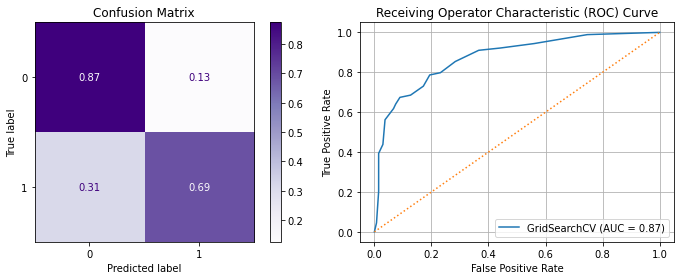

In [38]:
## Evaluate Model
evaluate_classification(grid,X_test,y_test);

### But how do we see the elbow plot for ks?

In [39]:
res_df = pd.DataFrame(grid.cv_results_)
res_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012804,0.001249,0.011695,0.001259,1,{'knn__n_neighbors': 1},0.666667,0.672897,0.604167,0.660194,0.628571,0.646499,0.026094,13
1,0.014876,0.001261,0.012645,0.000292,3,{'knn__n_neighbors': 3},0.666667,0.760000,0.659574,0.659574,0.727273,0.694618,0.041421,11
2,0.012779,0.000458,0.011771,0.000438,5,{'knn__n_neighbors': 5},0.666667,0.795918,0.659341,0.666667,0.732673,0.704253,0.053015,10
3,0.025488,0.027156,0.011411,0.001878,7,{'knn__n_neighbors': 7},0.630435,0.775510,0.652174,0.622222,0.757895,0.687647,0.065524,12
4,0.009569,0.000256,0.009454,0.000739,9,{'knn__n_neighbors': 9},0.644444,0.791667,0.681319,0.637363,0.770833,0.705125,0.064261,8
5,0.010379,0.001434,0.009673,0.001248,11,{'knn__n_neighbors': 11},0.681319,0.804124,0.681319,0.645161,0.762887,0.714962,0.058962,6
6,0.009211,0.000162,0.008921,0.000422,13,{'knn__n_neighbors': 13},0.688889,0.783505,0.711111,0.687500,0.760870,0.726375,0.038995,2
7,0.008983,0.000157,0.009200,0.000619,15,{'knn__n_neighbors': 15},0.681818,0.778947,0.689655,0.630435,0.778947,0.711961,0.058356,7
8,0.009276,0.000284,0.009243,0.000831,17,{'knn__n_neighbors': 17},0.689655,0.783505,0.704545,0.651685,0.782609,0.722400,0.052441,3
9,0.009803,0.000858,0.009615,0.000905,19,{'knn__n_neighbors': 19},0.696629,0.821053,0.703297,0.659091,0.800000,0.736014,0.063031,1


{'knn__n_neighbors': 19}


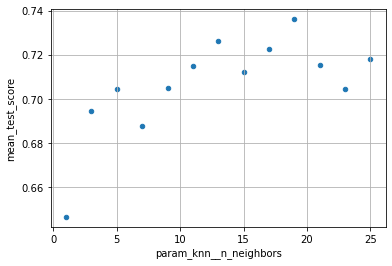

In [40]:
ax = res_df.plot(x='param_knn__n_neighbors',
                 y='mean_test_score',kind='scatter')
ax.grid()
print(grid.best_params_)

> ## ~~(Optional) Level Up:~~ Iterating on the data
As an ~~optional (but recommended!)~~ exercise:
- think about the decisions you made during the preprocessing steps that could have affected the overall model performance. 
    - For instance, you were asked to **replace the missing age values with the column median.** Could this have affected the overall performance? 
    - How might the model have fared if you had just dropped those rows, instead of using the column median? 
    - What if you reduced the data's dimensionality by ignoring some less important columns altogether?
- In the cells below, revisit your preprocessing stage and see if you can improve the overall results of the classifier by doing things differently. 
    - Consider dropping certain columns, dealing with missing values differently, or using an alternative scaling function. 
    - Then see how these different preprocessing techniques affect the performance of the model. 
    - Remember that the `find_best_k()` function handles all of the fitting; use this to iterate quickly as you try different strategies for dealing with data preprocessing! 

> #### KNN PARAMS:
- n_neighbors - 1-25(odd)
- weights : uniform/distance
- metric: euclidean,minkowski,manhattan

> #### Prerocessing Params:
    - strategty='median','mean

In [41]:
params =  {'preprocessor__num__imputer__strategy':['mean','median'],
          'knn__n_neighbors':list(range(1,52,2)),
          'knn__metric':['euclidian','minkowski','manhattan']}
grid = GridSearchCV(pipeline,params,scoring='f1')
grid

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidian', 'minkowski', 'manhattan'],
                         'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                              21, 23, 25, 27, 29, 31, 33, 35,
                                              37, 39, 41, 43, 45, 47, 49, 51],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             scoring='f1')

In [42]:
grid.fit(X_train,y_train)
print(grid.best_params_)

{'knn__metric': 'manhattan', 'knn__n_neighbors': 13, 'preprocessor__num__imputer__strategy': 'mean'}


------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       134
           1       0.81      0.71      0.75        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.81       223

------------------------------------------------------------




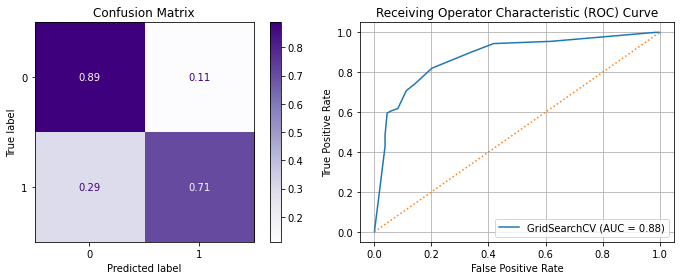

In [43]:
evaluate_classification(grid,X_test,y_test);

In [45]:
# knn_best_params = grid.best_params_
# knn_best_params

# So why use pipelines?

### For one, you Can Easily Add Other Models 

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
GaussianNB()

GaussianNB()

In [47]:
PIPES = {}

models = [('knn',KNeighborsClassifier), 
          ('bayes',GaussianNB),
          ('rf',RandomForestClassifier),
              ('log',LogisticRegression),
              ('svc',SVC)]


for name,model in models:
    PIPES[name] = Pipeline(steps=[('preprocessor',preprocessing),
                                 (name,model())])
    
PIPES['rf']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('rf', RandomForestClassifier())])

------------------------------------------------------------
[i] CLASSIFICATION REPORT knn
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       134
           1       0.77      0.71      0.74        89

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223

------------------------------------------------------------




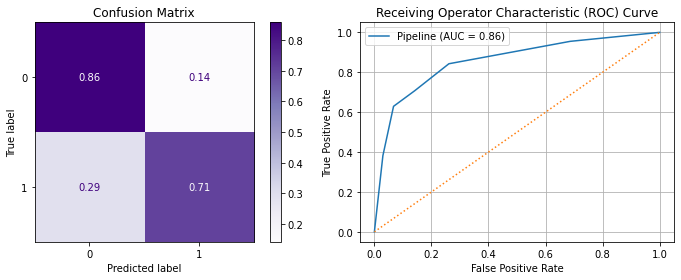

------------------------------------------------------------
[i] CLASSIFICATION REPORT bayes
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       134
           1       0.86      0.20      0.33        89

    accuracy                           0.67       223
   macro avg       0.75      0.59      0.55       223
weighted avg       0.73      0.67      0.60       223

------------------------------------------------------------




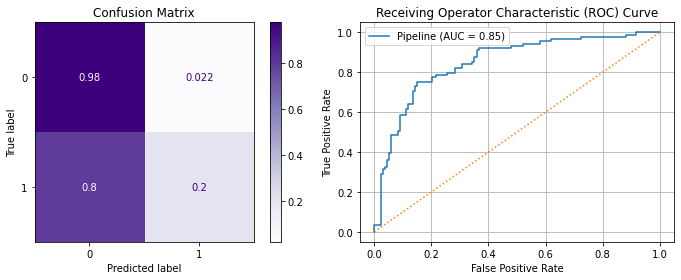

------------------------------------------------------------
[i] CLASSIFICATION REPORT rf
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       134
           1       0.73      0.75      0.74        89

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

------------------------------------------------------------




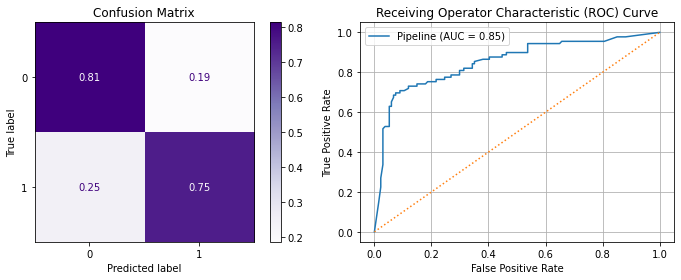

------------------------------------------------------------
[i] CLASSIFICATION REPORT log
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       134
           1       0.78      0.71      0.74        89

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

------------------------------------------------------------




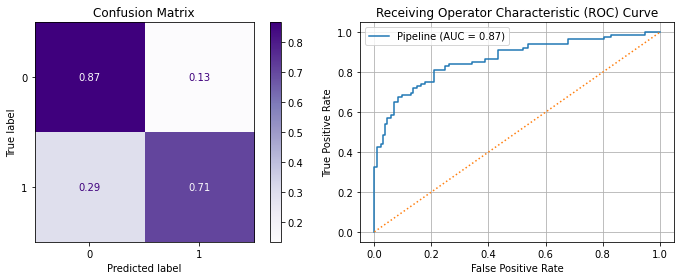

------------------------------------------------------------
[i] CLASSIFICATION REPORT svc
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       134
           1       0.80      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223

------------------------------------------------------------




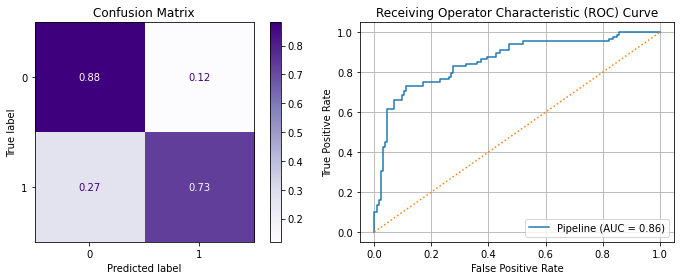

In [48]:
RESULTS = {}
for name, pipe in PIPES.items():
    RESULTS[name] = evaluate_classification(pipe.fit(X_train,y_train),
                                            X_test,y_test,label=name)


In [50]:
# row = '1'#'macro avgx'
# col = 'f1-score'
# for model,res_df in RESULTS.items():
# #     RESULTS['rf']
#     print(f"For {model}: {row} {col} = {res_df.loc[row,col]}")
    

# APPENDIX

#### Accessing Components of a Pipeline

In [ ]:
## Accessing contents of a pipeline
pipeline.named_steps.keys()

In [ ]:
print(pipeline.named_steps.keys())
print(pipeline.named_steps['preprocessor'])

In [ ]:
pipeline.named_steps

In [ ]:
pipeline.named_steps['preprocessor'].named_transformers_

In [ ]:
pipeline.named_steps['knn']


In [ ]:
pipeline.named_steps['knn'].get_params()

In [ ]:
set_config(display='text')#'diagram')

## ARCHIVE

In [ ]:
STOP

## Overly Complex Versions fo Functions

In [ ]:
import sklearn.metrics as metrics
def classification_report_df(y_test,y_hat_test,classes=None):
    report = pd.DataFrame(metrics.classification_report(y_test,y_hat_test,
                                                        target_names=classes,
                                                        output_dict=True))
    report.insert(len(report.columns)-3,' ','')
    report = report.T

    report.loc['accuracy',['precision','recall','f1-score']] = ''
    return report

classification_report_df(y_test,y_hat_test,classes=['Died','Survived'])

In [ ]:
def evaluate_classification(model,X_test,y_test,classes=None,
                           normalize='true',cmap='Purples',label='',
                           df_report = True):
    """Accepts an sklearn-compatible classification model + test data 
    and displays several sklearn.metrics functions: 
    - classifciation_report
    - plot_confusion_matrix
    - plot_roc_curve
    """
     
    ## Get Predictions
    y_hat_test = model.predict(X_test)
    
    ## Classification Report / Scores 
    table_header = "[i] CLASSIFICATION REPORT"

    ## Add Label 
    if len(label)>0:
        table_header += f" {label}"
        
    
    ## PRINT TABLE
    dashes = '---'*20
    print(dashes,table_header,dashes,sep='\n')
    
    
    ## CLASSIFICATION REPORT
    if df_report:
        report = classification_report_df(y_test,y_hat_test,classes=classes)
        display(report)
    else:
        print(metrics.classification_report(y_test,y_hat_test,
                                        target_names=classes))
        report = metrics.classification_report(y_test,y_hat_test,
                                               target_names=classes)
    print(dashes+"\n\n")
    
    
    ## MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,4),ncols=2)
    
    ## Confusion Matrix 
    metrics.plot_confusion_matrix(model, X_test,y_test,
                                  display_labels=classes,
                                  normalize=normalize,
                                 cmap=cmap,ax=axes[0])
    axes[0].set(title='Confusion Matrix')
    
    ## Roc Curve
    roc_plot = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].legend()
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].grid()
    axes[1].set_title('Receiving Operator Characteristic (ROC) Curve') 
    fig.tight_layout()
    plt.show()
    
    return report #fig,axes

## Yellow Brick Visulizations

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.contrib.classifier import DecisionViz
